In [1]:
import tensorflow as tf

In [6]:
print(tf.version)

<module 'tensorflow._api.v2.version' from 'c:\\python3.11\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes

Each tensor has a data type and a shape.

Data Types Include: float32, int32, string and others.

Shape: Represents the dimension of data.

In [9]:
string1 = tf.Variable("this is a string", tf.string) 
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

In [15]:
print(string1)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>


In [23]:
rank1_tensor = tf.Variable(["Test"], tf.string) 
rank2_tensor = tf.Variable([["test"]], tf.string)

In [24]:
rank2_tensor.shape

TensorShape([1, 1])

In [20]:
rank1_tensor.shape

TensorShape([1])

In [31]:
rank3_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)
rank3_tensor.shape

TensorShape([2, 2])

In [32]:
tf.rank(rank3_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [34]:
tf.rank(rank1_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [35]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

## ``Rank in Tensflow`` ``=`` *``ndims``* ``in numpy``

In [42]:
tensor1 = tf.ones([1,2,3])
tensor1  # tf.ones() creates a shape [1,2,3] tensor full of ones

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [44]:
import numpy as np
tensor11= np.ones([1,2,3])         #1channel/matrix,2rows,3columns
tensor11

array([[[1., 1., 1.],
        [1., 1., 1.]]])

In [47]:
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor2

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]], dtype=float32)>

In [53]:
tensor3 = tf.reshape(tensor2, [3,1,-1])  
tensor3

<tf.Tensor: shape=(3, 1, 2), dtype=float32, numpy=
array([[[1., 1.]],

       [[1., 1.]],

       [[1., 1.]]], dtype=float32)>

In [54]:
tensor3.shape

TensorShape([3, 1, 2])

-1 tells the tensor to calculate the size of the dimension in that place. But it can do it for only 1 place.


In [58]:
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensork = tf.Variable(matrix, dtype=tf.int32)  #Converting a matrix into tensor ==> write your matrix name and datatype
print(tensork.shape)

(4, 5)


In [60]:
tf.rank(tensork)                        

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [62]:
tensork

<tf.Variable 'Variable:0' shape=(4, 5) dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])>

In [70]:
three = tensork[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensork[0]  # selects the first row
print(row1)

column1 = tensork[:, 0]  # selects the first column
print(column1)

row_2_and_3 = tensork[1:3]  # selects second and third row
print(row_2_and_3)

row_2_and_4 = tensork[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensork[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [11 12 13 14 15]], shape=(2, 5), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


### Types of Tensors
Before we go to far, I will mention that there are diffent types of tensors. These are the most used and we will talk more in depth about each as they are used.
- Variable
- Constant
- Placeholder
- SparseTensor

With the execption of ```Variable``` all these tensors are immuttable, meaning their value may not change during execution.

For now, it is enough to understand that we use the Variable tensor when we want to potentially change the value of our tensor.


____________________________________________________________________________________________________________________________________________________

Let's talk about logistic regression

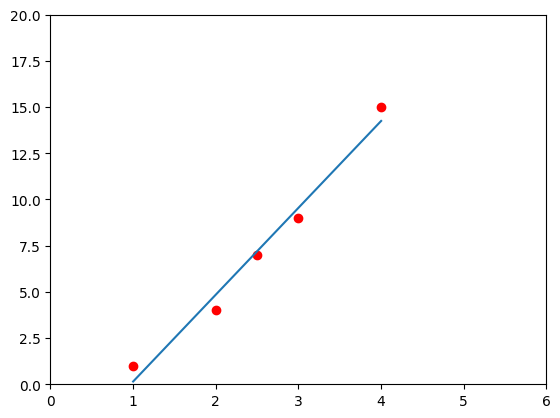

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))          #Best fit line ==>Linear regression done!! We can now predict new things
plt.show()

In [80]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [88]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')   #removing a column by pop from dftrain and adding that column to "y_train"
y_eval = dfeval.pop('survived')#removing a column by pop

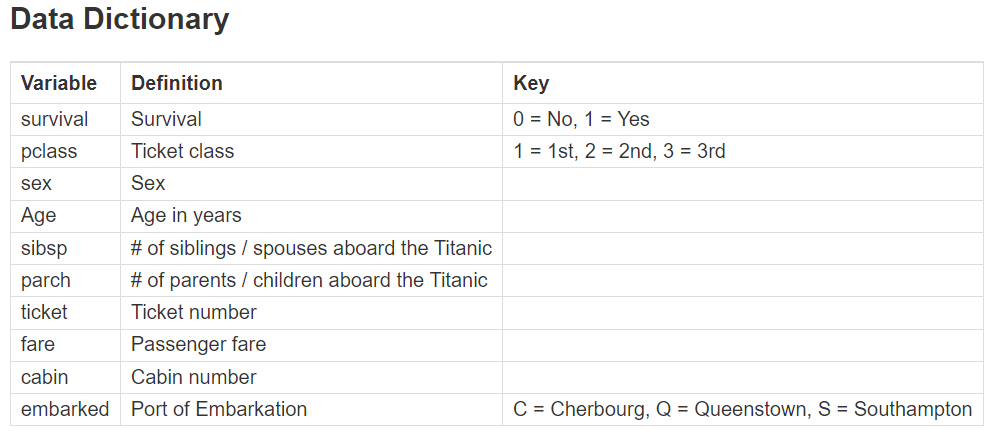
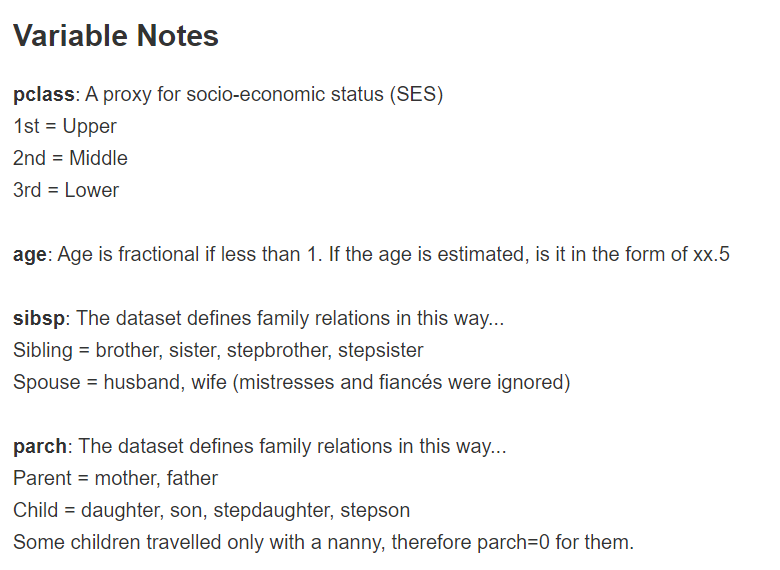

In [158]:
dftrain.head()
# y_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [91]:
dftrain.shape

(627, 9)

In [90]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [154]:
dftrain.loc[626]          #describing row 1 in detail

sex                         male
age                         32.0
n_siblings_spouses             0
parch                          0
fare                        7.75
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          y
Name: 626, dtype: object

In [96]:
print(y_train.shape)
print(y_eval.shape)

(627,)
(264,)


<Axes: >

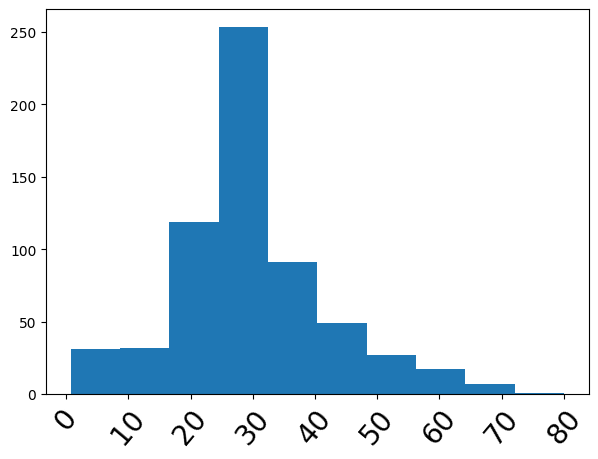

In [121]:
dftrain.age.hist(grid=False,bins=10,xlabelsize=20,xrot=50,figsize=[7,5])       #bins=10==>specifies no of bins

<Axes: ylabel='sex'>

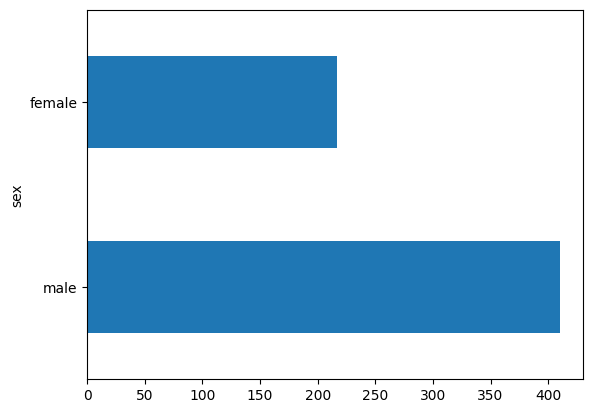

In [127]:
dftrain['sex'].value_counts().plot(kind='barh')

<Axes: ylabel='class'>

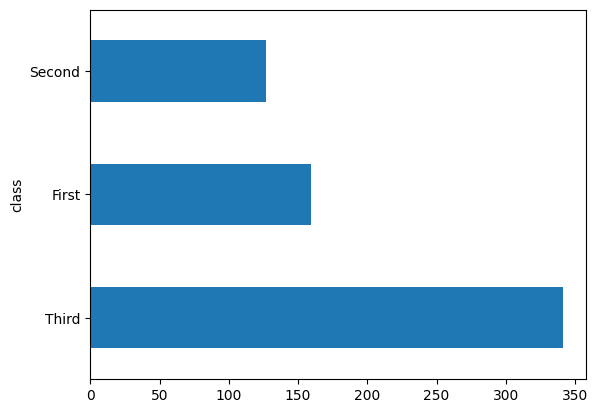

In [125]:
dftrain['class'].value_counts().plot(kind='barh')

Now we will learn an important techinqie which can be used 2 plot a graph between 2 different parameter from the same or different datasets

Text(0.5, 0, '% survive')

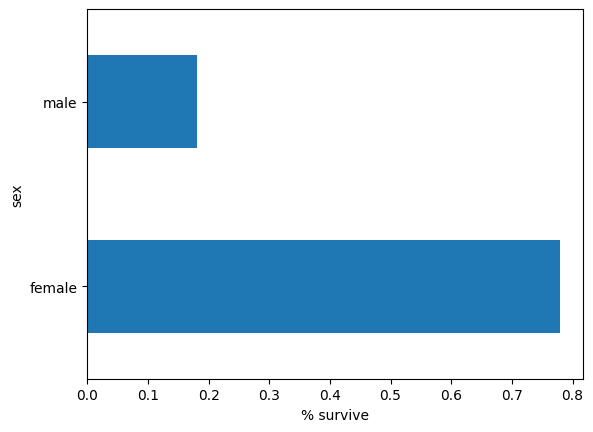

In [137]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')



1. `pd.concat([dftrain, y_train], axis=1)`: This line concatenates two DataFrames, `dftrain` and `y_train`, along the columns (axis=1). This operation essentially combines the features (dftrain) and the target variable (y_train) side by side. The assumption here is that you are working with a dataset where `dftrain` contains the features, and `y_train` contains the corresponding target variable values.

2. `.groupby('sex')`: After concatenating the DataFrames, it groups the resulting DataFrame by the "sex" column. This prepares the data for aggregation based on the values in the "sex" column, essentially splitting the data into male and female groups.

3. `.survived.mean()`: Within each group (male and female), it calculates the mean of the "survived" column. This assumes that "survived" is a binary column where 1 indicates survival and 0 indicates non-survival. By taking the mean, it computes the proportion of survivors for each group (male and female).

4. `.plot(kind='barh')`: This line generates a horizontal bar plot (barh) of the means calculated in the previous step. The x-axis represents the proportion of survivors, and the y-axis displays the "sex" categories, with horizontal bars indicating the proportion of survivors for each category.

5. `.set_xlabel('% survive')`: This part sets the x-axis label for the plot, indicating that it represents the percentage of survival.

In summary, the code combines the features and target variable, groups the data by gender, calculates the mean survival rate for each gender, and then creates a horizontal bar plot to visualize and compare the survival rates for males and females. The x-axis of the plot shows the percentage of survivors, and the bars represent the two categories, "male" and "female." This kind of analysis and visualization is common in data exploration and is useful for understanding the relationship between a categorical variable (gender) and a binary outcome (survival).

Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2).

In [138]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [ ]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Let's break down the code step by step:

1. `CATEGORICAL_COLUMNS` and `NUMERIC_COLUMNS`: These are lists that define the names of the categorical and numeric features in your dataset. Categorical features are typically non-numeric and represent categories or classes, while numeric features contain continuous or discrete numeric values.

2. `feature_columns = []`: This initializes an empty list called `feature_columns` where you'll store the feature column definitions.

3. Loop over the categorical features:
   ```python
   for feature_name in CATEGORICAL_COLUMNS:
       vocabulary = dftrain[feature_name].unique()
   ```
   For each categorical feature in `CATEGORICAL_COLUMNS`, you are creating a feature column using `tf.feature_column.categorical_column_with_vocabulary_list`. This function creates a categorical feature column with a fixed list of possible values (vocabulary). Here's what's happening:
   - `feature_name` is the name of the current categorical feature (e.g., 'sex').
   - `dftrain[feature_name]` retrieves the values of that feature from your DataFrame.
   - `.unique()` gets the unique values in that feature column, effectively building the vocabulary.
   - `tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)` creates a feature column for this categorical feature and appends it to the `feature_columns` list.

4. Loop over the numeric features:
   ```python
   for feature_name in NUMERIC_COLUMNS:
       feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
   ```
   For each numeric feature in `NUMERIC_COLUMNS`, you are creating a feature column using `tf.feature_column.numeric_column`. This function creates a numeric feature column. The `feature_name` specifies the name of the feature, and `dtype=tf.float32` specifies the data type of the feature. These numeric feature columns are also appended to the `feature_columns` list.

5. `print(feature_columns)`: This line prints the list of feature columns you have created, which includes both categorical and numeric feature columns.

In summary, the code is preparing feature columns for a machine learning model. Categorical features are represented as categorical columns with predefined vocabularies, and numeric features are represented as numeric columns. These feature columns will be used in our TensorFlow model for data preprocessing and feature transformation.

In [146]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [155]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use   

In [ ]:
train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

This code defines a function, `make_input_fn`, for creating input functions that can be used to feed data to a TensorFlow model. These input functions are designed for training and evaluation processes in machine learning. Let's break down the code step by step:

1. `def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):`
   - This is a function definition for `make_input_fn`, which takes several parameters:
     - `data_df`: A DataFrame containing the feature data.
     - `label_df`: A DataFrame containing the labels or target values.
     - `num_epochs`: The number of times to iterate over the dataset (default is set to 10).
     - `shuffle`: A boolean indicating whether to shuffle the data (default is `True`).
     - `batch_size`: The batch size for the dataset (default is 32).

2. `def input_function():`
   - Within the `make_input_fn` function, an inner function named `input_function` is defined. This inner function will be returned and can be used to create TensorFlow Datasets for training and evaluation.

3. `ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))`
   - This line creates a TensorFlow dataset (`ds`) using the `tf.data.Dataset.from_tensor_slices` method. It combines the feature data (from `data_df`) and the label data (from `label_df`) into pairs using the `dict` function. This step prepares the data for input to a machine learning model.

4. `if shuffle:`
   - This conditional statement checks whether the `shuffle` parameter is set to `True`. If it is, the data in the dataset is randomized to change the order of examples. Shuffling the data can help improve the training process by reducing the potential for the model to memorize the order of the data.

5. `ds = ds.batch(batch_size).repeat(num_epochs)`
   - This line batches the data into batches of size `batch_size`, and it repeats the dataset for `num_epochs`. Batching the data helps with memory efficiency during training, and repeating the dataset for multiple epochs means that the data will be iterated over multiple times during training.

6. `return ds`
   - The `input_function` returns the prepared dataset, which is a batched and, potentially, shuffled dataset.

7. `return input_function`
   - The `make_input_fn` function itself returns the inner `input_function`. This returned function can be called to create dataset objects for training and evaluation. For example, `train_input_fn` and `eval_input_fn` are created by calling `make_input_fn` with specific datasets and configurations.


These input functions are a common practice in TensorFlow for handling and preprocessing data to train and evaluate machine learning models.